In [8]:
'''
1. Read `yelp.csv` into a DataFrame.
    * **Bonus:** Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.
'''

'\n1. Read `yelp.csv` into a DataFrame.\n    * **Bonus:** Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.\n'

In [138]:
import pandas as pd

In [139]:
yelp_data = pd.read_csv('yelp.csv')

In [140]:
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [141]:
'''2. Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.'''

'Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.'

In [142]:
votes_stars = yelp_data[['stars','cool','useful','funny']]

In [143]:
votes_stars.head()

,stars,cool,useful,funny
0,5,2,5,0
1,5,0,0,0
2,4,0,1,0
3,5,1,2,0
4,5,0,0,0


In [144]:
import matplotlib.pyplot as plt

In [145]:
%matplotlib inline

In [146]:
feature_cols = ['cool','useful','funny']

In [148]:
import seaborn as sns

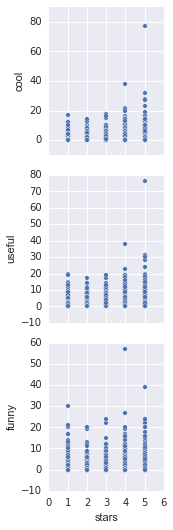

In [149]:
sns.pairplot(votes_stars,y_vars=feature_cols,x_vars='stars')

In [150]:
'''3. Define cool/useful/funny as the features, and stars as the response.'''

'3. Define cool/useful/funny as the features, and stars as the response.'

In [151]:
X = votes_stars[feature_cols]

In [152]:
y = votes_stars['stars']

In [153]:
X.head()

,cool,useful,funny
0,2,5,0
1,0,0,0
2,0,1,0
3,1,2,0
4,0,0,0


In [154]:
X.shape

(10000, 3)

In [155]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [156]:
y.shape

(10000L,)

In [157]:
'''4. Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? 
Explore the Yelp website to see if you detect similar trends.'''

'Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? \nExplore the Yelp website to see if you detect similar trends.'

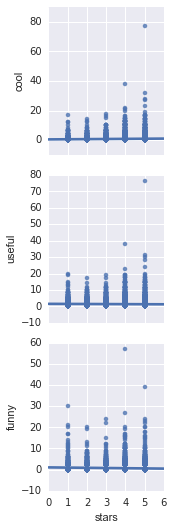

In [158]:
sns.pairplot(votes_stars,y_vars=feature_cols,x_vars='stars', kind='reg')

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [162]:
zip(feature_cols,linreg.coef_)

[('cool', 0.27435946858859295),
 ('useful', -0.14745239099400873),
 ('funny', -0.13567449053705782)]

In [163]:
'''
Keeping all other features fixed, incease in cool votes by 1 is associated with star points increase of 0.27 
Keeping all other features fixed, incease in useful votes by 1 is associated with star points decrease of 0.147
Keeping all other features fixed, incease in funny votes by 1 is associated with star points decrease of 0.135
'''

'\nKeeping all other features fixed, incease in cool votes by 1 is associated with star points increase of 0.27 \nKeeping all other features fixed, incease in useful votes by 1 is associated with star points decrease of 0.147\nKeeping all other features fixed, incease in funny votes by 1 is associated with star points decrease of 0.135\n'

In [164]:
'''5. Evaluate the model by splitting it into training and testing sets and computing the RMSE.
Does the RMSE make intuitive sense to you?'''

'Evaluate the model by splitting it into training and testing sets and computing the RMSE.\nDoes the RMSE make intuitive sense to you?'

In [165]:
from sklearn.cross_validation import train_test_split

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)

In [167]:
X_train.head()

,cool,useful,funny
9174,1,2,1
4379,1,2,1
541,0,0,0
7251,0,0,0
1135,7,8,10


In [168]:
from sklearn import metrics
import numpy as np

In [169]:
def train_test_rmse(feature_cols):
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [170]:
train_test_rmse(['cool','useful','funny'])

1.1733686274194486

In [171]:
'''6. Try removing some of the features and see if the RMSE improves.'''

'Try removing some of the features and see if the RMSE improves.'

In [172]:
train_test_rmse(['cool','useful'])

1.1733686274194486

In [174]:
train_test_rmse(['cool','funny'])

1.1733686274194486

In [176]:
train_test_rmse(['useful','funny'])

1.1733686274194486

In [177]:
'''8. **Bonus:** Compare your best RMSE on the testing set with the RMSE for the "null model",
which is the model that ignores all features and simply predicts the mean response value in the testing set.'''

'8. **Bonus:** Compare your best RMSE on the testing set with the RMSE for the "null model",\nwhich is the model that ignores all features and simply predicts the mean response value in the testing set.'

In [179]:
y_null = np.zeros_like(y_test,dtype=float)

In [181]:
y_null.fill(y_test.mean())

In [183]:
y_null

array([ 3.7808,  3.7808,  3.7808, ...,  3.7808,  3.7808,  3.7808])

In [185]:
np.sqrt(metrics.mean_squared_error(y_test,y_null))

1.2019781029619465

In [186]:
'''9. **Bonus:** Instead of treating this as a regression problem,
treat it as a classification problem and see what testing accuracy you can achieve with KNN.'''

'9. **Bonus:** Instead of treating this as a regression problem,\ntreat it as a classification problem and see what testing accuracy you can achieve with KNN.'

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [192]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')


In [204]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [206]:
y_pred = knn.predict(X_test)

In [209]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

1.517893276880822